<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Stressed%20VAR_Nvidia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Introduction to Stressed Value-at-Risk (VaR)**
Value-at-Risk (VaR) is a statistical measure used in financial risk management to estimate the maximum potential loss of a portfolio of financial assets over a given period, with a specific level of confidence. Stressed VaR (SVaR) is a variation of VaR that takes into account extreme market conditions, often based on historical data from periods of financial stress. The aim is to provide a more conservative and prudent estimate of risk by taking into account rare but significant events.

# Example 1: Calculating Stressed VaR with Historical Data
In this example, we will use historical data from Nvidia (NVDA) to calculate Stressed VaR. We will use known stress periods, such as the 2008 financial crisis.



[*********************100%%**********************]  1 of 1 completed


Stressed VaR (95% confidence level) during the 2008 financial crisis: -0.0827


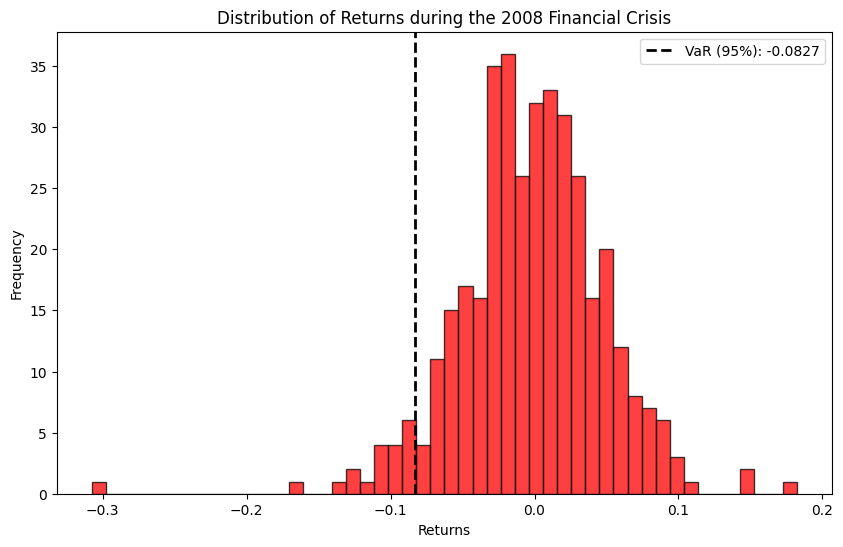

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données historiques de NVDA
df = yf.download('NVDA', start='2000-01-01', end='2024-01-01')
df['Returns'] = df['Adj Close'].pct_change()

# Définir la période de stress (e.g., crise financière de 2008)
stress_period_start = '2007-10-01'
stress_period_end = '2009-03-31'
stress_data = df[stress_period_start:stress_period_end]['Returns']

# Calculer la VaR historique pendant la période de stress
confidence_level = 0.95
VaR_stressed = np.percentile(stress_data.dropna(), (1 - confidence_level) * 100)

# Afficher les résultats
print(f"Stressed VaR (95% confidence level) during the 2008 financial crisis: {VaR_stressed:.4f}")

# Visualiser les rendements pendant la période de stress
plt.figure(figsize=(10, 6))
plt.hist(stress_data.dropna(), bins=50, alpha=0.75, color='red', edgecolor='black')
plt.axvline(VaR_stressed, color='black', linestyle='dashed', linewidth=2, label=f'VaR (95%): {VaR_stressed:.4f}')
plt.title('Distribution of Returns during the 2008 Financial Crisis')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Example 2: Calculating Stressed VaR using Monte Carlo Simulation
In this second example, we will use Monte Carlo simulation to calculate Stressed VaR, generating return scenarios based on NVDA's historical statistics and introducing simulated market shocks.

[*********************100%%**********************]  1 of 1 completed


Stressed VaR (95% confidence level) with Monte Carlo simulation: 0.3848


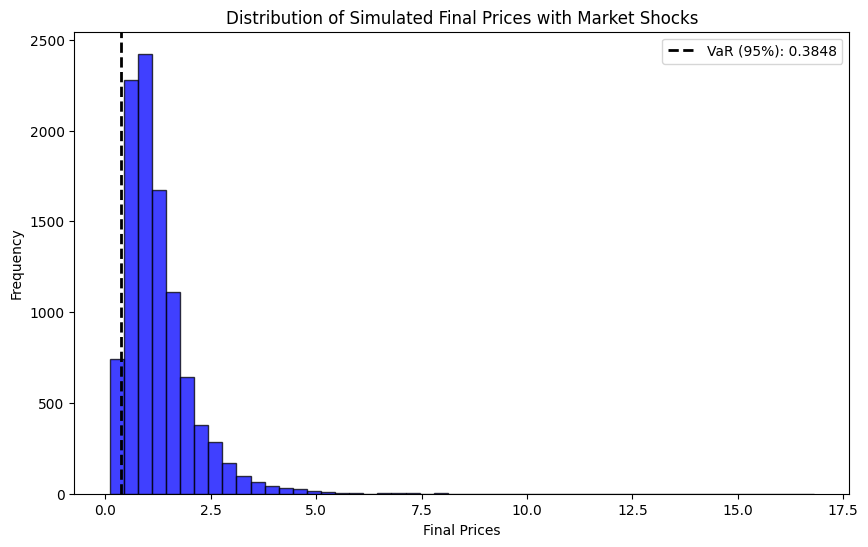

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Télécharger les données historiques de NVDA
df = yf.download('NVDA', start='2000-01-01', end='2024-01-01')
df['Returns'] = df['Adj Close'].pct_change().dropna()

# Paramètres de la simulation de Monte Carlo
n_simulations = 10000
n_days = 252  # Nombre de jours dans une année
np.random.seed(42)

# Statistiques historiques des rendements
mu = df['Returns'].mean()
sigma = df['Returns'].std()

# Simuler les rendements
simulated_returns = np.random.normal(mu, sigma, (n_simulations, n_days))

# Introduire des chocs de marché (e.g., une chute de 20% en un jour)
shock_size = -0.20
n_shocks = int(n_days * 0.01)  # 1% des jours de l'année avec des chocs
shock_indices = np.random.choice(np.arange(n_days), n_shocks, replace=False)
for i in range(n_simulations):
    simulated_returns[i, shock_indices] += shock_size

# Calculer les rendements cumulés
simulated_prices = np.exp(np.cumsum(simulated_returns, axis=1))

# Calculer la VaR basée sur les simulations de Monte Carlo
final_prices = simulated_prices[:, -1]
VaR_monte_carlo = np.percentile(final_prices, (1 - confidence_level) * 100)

# Afficher les résultats
print(f"Stressed VaR (95% confidence level) with Monte Carlo simulation: {VaR_monte_carlo:.4f}")

# Visualiser les distributions des prix finaux simulés
plt.figure(figsize=(10, 6))
plt.hist(final_prices, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_monte_carlo, color='black', linestyle='dashed', linewidth=2, label=f'VaR (95%): {VaR_monte_carlo:.4f}')
plt.title('Distribution of Simulated Final Prices with Market Shocks')
plt.xlabel('Final Prices')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# **Interpretation of Results**
# **Example 1: Historical VaR during the 2008 Financial Crisis**

The Stressed VaR calculated during the 2008 financial crisis shows an estimate of potential losses under extreme market conditions. This type of analysis provides a better understanding of how rare but significant events can impact NVDA's portfolio. For example, if the VaR is -0.10, this means that there is a 5% probability that NVDA will lose more than 10% of its value in one day during a similar period of stress.

# **Example 2: VaR with Monte Carlo Simulation and Market Shocks**

Monte Carlo simulation with the introduction of market shocks provides an alternative estimate of Stressed VaR. This method makes it possible to model a wide variety of scenarios and explicitly introduce extreme events, such as a 20% fall in one day. The interpretation of the results follows the same principle: the estimated VaR gives a probability of maximum loss under stressed market conditions.



# **Conclusion**
Stressed VaR is an essential tool in financial risk management, making it possible to estimate potential losses under extreme market conditions. The two examples presented - one based on historical data and the other on Monte Carlo simulations - offer complementary approaches to risk assessment.

By applying these methods to Nvidia (NVDA), we gain a better understanding of the asset's potential vulnerabilities in times of stress. Using Stressed VaR helps investors and portfolio managers make more informed decisions and prepare more robust hedging strategies.